In [32]:
import numpy as np
import pandas as pd
import seaborn as sns
import warnings 
warnings.filterwarnings('ignore')

In [33]:
data = pd.read_csv(r'C:\Users\Vaishnavi\Desktop\dataglacier1\week9\bank-additional-full.csv', ';')
data.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


<h1>Data Description</h1>
<h5>1 - age (numeric)</h5>
<h5>2 - job : type of job (categorical: "admin.","blue-collar","entrepreneur","housemaid","management","retired","self-employed","services","student","technician","unemployed","unknown")</h5>
<h5>3 - marital : marital status (categorical: "divorced","married","single","unknown"; note: "divorced" means divorced or widowed)</h5>
<h5>4 - education (categorical: "basic.4y","basic.6y","basic.9y","high.school","illiterate","professional.course","university.degree","unknown")</h5>
<h5>5 - default: has credit in default? (categorical: "no","yes","unknown")</h5>
<h5>6 - housing: has housing loan? (categorical: "no","yes","unknown")</h5>
<h5>7 - loan: has personal loan? (categorical: "no","yes","unknown")</h5>
<h2>related with the last contact of the current campaign</h2>
<h5>8 - contact: contact communication type (categorical: "cellular","telephone")</h5>
<h5>9 - month: last contact month of year (categorical: "jan", "feb", "mar", ..., "nov", "dec")</h5>
<h5>10 - day_of_week: last contact day of the week (categorical: "mon","tue","wed","thu","fri")</h5>
<h5>11 - duration: last contact duration, in seconds (numeric). Important note:  this attribute highly affects the output target (e.g., if duration=0 then y="no"). Yet, the duration is not known before a call is performed. Also, after the end of the call y is obviously known. Thus, this input should only be included for benchmark purposes and should be discarded if the intention is to have a realistic predictive model.</h5>
<h2>other attributes</h2>
<h5> 12 - campaign: number of contacts performed during this campaign and for this client (numeric, includes last contact)</h5>
<h5>13 - pdays: number of days that passed by after the client was last contacted from a previous campaign (numeric; 999 means client was not previously contacted)</h5>
<h5>14 - previous: number of contacts performed before this campaign and for this client (numeric)</h5>
<h5>15 - poutcome: outcome of the previous marketing campaign (categorical: "failure","nonexistent","success")</h5>
<h2> social and economic context attributes </h2>
<h5>16 - emp.var.rate: employment variation rate - quarterly indicator (numeric)</h5>
<h5>17 - cons.price.idx: consumer price index - monthly indicator (numeric)</h5>   
<h5>18 - cons.conf.idx: consumer confidence index - monthly indicator (numeric)</h5>    
<h5>19 - euribor3m: euribor 3 month rate - daily indicator (numeric)</h5>
<h5>20 - nr.employed: number of employees - quarterly indicator (numeric)</h5>
<h5>21 - y - has the client subscribed a term deposit? (binary: "yes","no")</h5>


In [34]:
data.shape

(41188, 21)

In [35]:
#counting null values
data.isnull().sum()

age               0
job               0
marital           0
education         0
default           0
housing           0
loan              0
contact           0
month             0
day_of_week       0
duration          0
campaign          0
pdays             0
previous          0
poutcome          0
emp.var.rate      0
cons.price.idx    0
cons.conf.idx     0
euribor3m         0
nr.employed       0
y                 0
dtype: int64

In [36]:
#desciption of numeric values in the data
data.describe()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
count,41188.00000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000
mean,40.02406,258.285010,2.567593,962.475454,0.172963,0.081886,93.575664,-40.502600,3.621291,5167.035911
std,10.42125,259.279249,2.770014,186.910907,0.494901,1.570960,0.578840,4.628198,1.734447,72.251528
min,17.00000,0.000000,1.000000,0.000000,0.000000,-3.400000,92.201000,-50.800000,0.634000,4963.600000
25%,32.00000,102.000000,1.000000,999.000000,0.000000,-1.800000,93.075000,-42.700000,1.344000,5099.100000
50%,38.00000,180.000000,2.000000,999.000000,0.000000,1.100000,93.749000,-41.800000,4.857000,5191.000000
75%,47.00000,319.000000,3.000000,999.000000,0.000000,1.400000,93.994000,-36.400000,4.961000,5228.100000
max,98.00000,4918.000000,56.000000,999.000000,7.000000,1.400000,94.767000,-26.900000,5.045000,5228.100000


In [37]:
#info about the given data set
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 non-null  float64
 17  cons.conf.idx   41188 non-null 

In [38]:
#printing duplicate values
data[data.duplicated()]

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
1266,39,blue-collar,married,basic.6y,no,no,no,telephone,may,thu,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.855,5191.0,no
12261,36,retired,married,unknown,no,no,no,telephone,jul,thu,...,1,999,0,nonexistent,1.4,93.918,-42.7,4.966,5228.1,no
14234,27,technician,single,professional.course,no,no,no,cellular,jul,mon,...,2,999,0,nonexistent,1.4,93.918,-42.7,4.962,5228.1,no
16956,47,technician,divorced,high.school,no,yes,no,cellular,jul,thu,...,3,999,0,nonexistent,1.4,93.918,-42.7,4.962,5228.1,no
18465,32,technician,single,professional.course,no,yes,no,cellular,jul,thu,...,1,999,0,nonexistent,1.4,93.918,-42.7,4.968,5228.1,no
20216,55,services,married,high.school,unknown,no,no,cellular,aug,mon,...,1,999,0,nonexistent,1.4,93.444,-36.1,4.965,5228.1,no
20534,41,technician,married,professional.course,no,yes,no,cellular,aug,tue,...,1,999,0,nonexistent,1.4,93.444,-36.1,4.966,5228.1,no
25217,39,admin.,married,university.degree,no,no,no,cellular,nov,tue,...,2,999,0,nonexistent,-0.1,93.200,-42.0,4.153,5195.8,no
28477,24,services,single,high.school,no,yes,no,cellular,apr,tue,...,1,999,0,nonexistent,-1.8,93.075,-47.1,1.423,5099.1,no
32516,35,admin.,married,university.degree,no,yes,no,cellular,may,fri,...,4,999,0,nonexistent,-1.8,92.893,-46.2,1.313,5099.1,no


In [39]:
#dropping duplicate values
data.drop_duplicates(inplace=True)

In [40]:
print('Previous shape was 41188, 21')
print(f'Current after removing duplicates, shape is {data.shape}')

Previous shape was 41188, 21
Current after removing duplicates, shape is (41176, 21)


In [41]:
cols = ['age', 'job', 'marital', 'education', 'default', 'housing', 'loan',
       'contact', 'month', 'day_of_week', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'emp.var.rate', 'cons.price.idx',
       'cons.conf.idx', 'euribor3m', 'nr.employed', 'y']

In [42]:
for i in range(len(cols)):
    print(f'\n   {cols[i]} - unique values \n{data[cols[i]].unique()}')


   age - unique values 
[56 57 37 40 45 59 41 24 25 29 35 54 46 50 39 30 55 49 34 52 58 32 38 44
 42 60 53 47 51 48 33 31 43 36 28 27 26 22 23 20 21 61 19 18 70 66 76 67
 73 88 95 77 68 75 63 80 62 65 72 82 64 71 69 78 85 79 83 81 74 17 87 91
 86 98 94 84 92 89]

   job - unique values 
['housemaid' 'services' 'admin.' 'blue-collar' 'technician' 'retired'
 'management' 'unemployed' 'self-employed' 'unknown' 'entrepreneur'
 'student']

   marital - unique values 
['married' 'single' 'divorced' 'unknown']

   education - unique values 
['basic.4y' 'high.school' 'basic.6y' 'basic.9y' 'professional.course'
 'unknown' 'university.degree' 'illiterate']

   default - unique values 
['no' 'unknown' 'yes']

   housing - unique values 
['no' 'yes' 'unknown']

   loan - unique values 
['no' 'yes' 'unknown']

   contact - unique values 
['telephone' 'cellular']

   month - unique values 
['may' 'jun' 'jul' 'aug' 'oct' 'nov' 'dec' 'mar' 'apr' 'sep']

   day_of_week - unique values 
['mon' 'tue' 'w

<h5>Boxplot before removing outliers</h5>

<AxesSubplot:xlabel='age'>

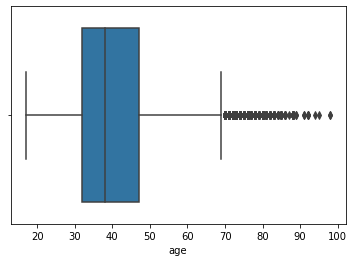

In [43]:
sns.boxplot(data['age'])

<AxesSubplot:xlabel='duration'>

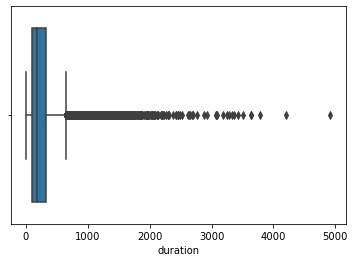

In [44]:
sns.boxplot(data['duration'])

<AxesSubplot:xlabel='campaign'>

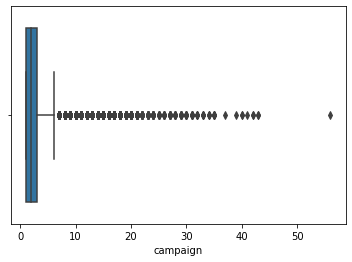

In [45]:
sns.boxplot(data['campaign'])

In [46]:
#Eliminating Outliers for age
upper = data['age'].mean() + 3*data['age'].std()
lower = data['age'].mean() - 3*data['age'].std()
print(f'Upper limit for col - age is {upper} & lower limit is {lower}')
data = data[(data['age'] < upper) & (data['age'] > lower) ]  
data.shape

Upper limit for col - age is 71.2858398788315 & lower limit is 8.76176066517472


(40807, 21)

In [47]:
#Eliminating Outliers for duration
upper = data['duration'].mean() + 3*data['duration'].std()
lower = data['duration'].mean() - 3*data['duration'].std()
print(f'Upper limit for col - duration is {upper} & lower limit is {lower}')
data = data[(data['duration'] < upper) & (data['duration'] > lower) ]  
data.shape

Upper limit for col - duration is 1037.3596861184076 & lower limit is -521.0020513988741


(39954, 21)

In [48]:
#Eliminating Outliers for campaign
upper = data['campaign'].mean() + 3*data['campaign'].std()
lower = data['campaign'].mean() - 3*data['campaign'].std()
print(f'Upper limit for col -campaign {upper} & lower limit is {lower}')
data = data[(data['campaign'] < upper) & (data['campaign'] > lower) ]  
data.shape

Upper limit for col -campaign 10.930846687242923 & lower limit is -5.785429457428637


(39101, 21)

2087 rows where droped till now to remove outliers using z-score and to remove duplicates

<h5>Boxplot after removing outliers</h5>

<AxesSubplot:xlabel='age'>

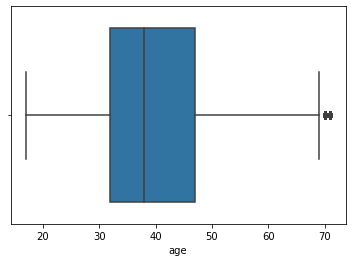

In [49]:
sns.boxplot(data['age'])

<AxesSubplot:xlabel='duration'>

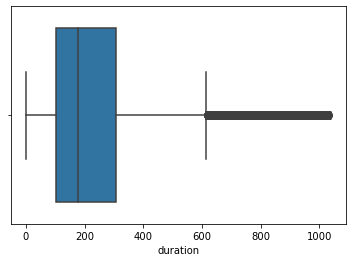

In [50]:
sns.boxplot(data['duration'])

<AxesSubplot:xlabel='campaign'>

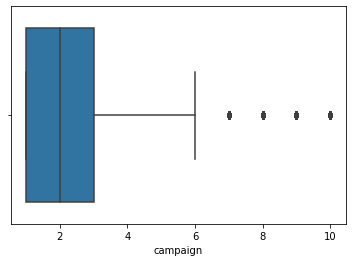

In [51]:
sns.boxplot(data['campaign'])

<h1>Data Transformation</h1>

In [52]:
#converting categorical values to numeric categories
categorical = [ 'job', 'marital', 'education', 'default', 'housing', 'loan',
       'contact', 'month', 'day_of_week', 'poutcome','y']

#printing number of unique values in each categories
for i in range(len(categorical)):
    print(f'\n   {categorical[i]} - Number of unique values \n{data[categorical[i]].value_counts()}')


   job - Number of unique values 
admin.           9955
blue-collar      8851
technician       6478
services         3816
management       2810
entrepreneur     1390
self-employed    1355
retired          1319
housemaid         994
unemployed        973
student           851
unknown           309
Name: job, dtype: int64

   marital - Number of unique values 
married     23647
single      11064
divorced     4316
unknown        74
Name: marital, dtype: int64

   education - Number of unique values 
university.degree      11619
high.school             9081
basic.9y                5776
professional.course     5008
basic.4y                3809
basic.6y                2181
unknown                 1611
illiterate                16
Name: education, dtype: int64

   default - Number of unique values 
no         30942
unknown     8156
yes            3
Name: default, dtype: int64

   housing - Number of unique values 
yes        20519
no         17640
unknown      942
Name: housing, dtype: int64

In [53]:
#converting categoricals values
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()

for colc in categorical:
    data[colc] = le.fit_transform(data[colc])
    


In [54]:
for i in range(len(categorical)):
    print(f'\n   {categorical[i]} - Number of unique values \n{data[categorical[i]].value_counts()}')


   job - Number of unique values 
0     9955
1     8851
9     6478
7     3816
4     2810
2     1390
6     1355
5     1319
3      994
10     973
8      851
11     309
Name: job, dtype: int64

   marital - Number of unique values 
1    23647
2    11064
0     4316
3       74
Name: marital, dtype: int64

   education - Number of unique values 
6    11619
3     9081
2     5776
5     5008
0     3809
1     2181
7     1611
4       16
Name: education, dtype: int64

   default - Number of unique values 
0    30942
1     8156
2        3
Name: default, dtype: int64

   housing - Number of unique values 
2    20519
0    17640
1      942
Name: housing, dtype: int64

   loan - Number of unique values 
0    32243
2     5916
1      942
Name: loan, dtype: int64

   contact - Number of unique values 
0    24843
1    14258
Name: contact, dtype: int64

   month - Number of unique values 
6    13307
3     6661
1     5850
4     4969
7     3984
0     2508
8      650
9      516
5      498
2      158
Name: mon

In [55]:
data.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,3,1,0,0,0,0,1,6,1,...,1,999,0,1,1.1,93.994,-36.4,4.857,5191.0,0
1,57,7,1,3,1,0,0,1,6,1,...,1,999,0,1,1.1,93.994,-36.4,4.857,5191.0,0
2,37,7,1,3,0,2,0,1,6,1,...,1,999,0,1,1.1,93.994,-36.4,4.857,5191.0,0
3,40,0,1,1,0,0,0,1,6,1,...,1,999,0,1,1.1,93.994,-36.4,4.857,5191.0,0
4,56,7,1,3,0,0,2,1,6,1,...,1,999,0,1,1.1,93.994,-36.4,4.857,5191.0,0
